#Nigeria World Development Indicators

I wanted to choose a DataSet with lots of numerical data that could be used for correlation analysis

I am Nigerian and so this dataset is of interest to me

The dataset contains almost 1500 indicators that the world bank assess contries on. The data spans 64 years staring from 1960 to 2023.
The data represents various social, economic, environmental, and institutional data about Nigeria over the time period.

The dataset is from the [World Bank](https://databank.worldbank.org/reports.aspx?source=2&country=NGA)

In [ ]:
#importing the necessary packages to be able to analyse the data and create plots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#now I will load the data into a dataframe using pandas.
ngn = pd.read_csv('ngn_world_bank.csv', header=2)
ngn.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Nigeria,NGA,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.360419e+01,NaN,NaN,2.174079e+01,NaN,NaN,NaN,NaN,NaN
1,Nigeria,NGA,"Internally displaced persons, new displacement...",VC.IDP.NWDS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+05,7.800000e+04,1.220000e+05,6.130000e+05,1.570000e+05,2.790000e+05,2.400000e+04,2.437000e+06,166000.0,NaN
2,Nigeria,NGA,"Voice and Accountability: Percentile Rank, Upp...",VA.PER.RNK.UPPER,NaN,NaN,NaN,NaN,NaN,NaN,...,4.088670e+01,4.187192e+01,4.137931e+01,3.737864e+01,3.768116e+01,3.478261e+01,3.429952e+01,3.526570e+01,NaN,NaN
3,Nigeria,NGA,Voice and Accountability: Estimate,VA.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.726138e-01,-3.193625e-01,-3.399181e-01,-4.242899e-01,-4.340020e-01,-5.810144e-01,-6.377547e-01,-5.952110e-01,NaN,NaN
4,Nigeria,NGA,High-technology exports (current US$),TX.VAL.TECH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.950953e+08,7.388348e+06,1.831564e+07,4.163144e+07,8.542468e+07,1.903267e+08,1.959472e+08,7.649904e+07,NaN,NaN


## Exploration and Cleaning


In [ ]:
ngn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1488 non-null   object 
 1   Country Code    1488 non-null   object 
 2   Indicator Name  1488 non-null   object 
 3   Indicator Code  1488 non-null   object 
 4   1960            164 non-null    float64
 5   1961            177 non-null    float64
 6   1962            195 non-null    float64
 7   1963            212 non-null    float64
 8   1964            214 non-null    float64
 9   1965            219 non-null    float64
 10  1966            215 non-null    float64
 11  1967            218 non-null    float64
 12  1968            223 non-null    float64
 13  1969            224 non-null    float64
 14  1970            318 non-null    float64
 15  1971            334 non-null    float64
 16  1972            340 non-null    float64
 17  1973            333 non-null    f

Before loading the data into the notebook, I noticed that the header rows actually start on the 3rd row, so I reassigned the header to that row.

After loading the data into pandas and inspecting it using the .head() method, I notice that the first 2 columns just say "Nigeria" (Country Name) and "NGA" (Country Code). I will drop these columns because they are not necessary for the analysis as all the data relates to Nigeria.

I will also remove the "Indicator Code" column because it is not relevant for this analysis.

From just loading the data and viewing the first few rows, I can see there is a lot of missing data. So I used .info() for further explorations to see what is missing and what steps I should take about the missing data. I can see that almost all the years have more than half of the values as null. I also notice that the final column is totally empty, so I will also drop that

Finally, I noticed that the years are the columns and the actual variables are in the rows. I need to swap these around. Because I have already decided to transpose the dataFrame, I won't be using .describe() for more exploration until I complete the transposing.

In [ ]:
#here, I am dropping the irrelevant columns and the last column which is empty
ngn_drop = ngn.drop(['Country Name', 'Country Code', 'Indicator Code', 'Unnamed: 68'], axis=1)
ngn_drop.head()

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Intentional homicides (per 100,000 people)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.360419e+01,NaN,NaN,2.174079e+01,NaN,NaN,NaN,NaN
1,"Internally displaced persons, new displacement...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000e+03,1.000000e+05,7.800000e+04,1.220000e+05,6.130000e+05,1.570000e+05,2.790000e+05,2.400000e+04,2.437000e+06,166000.0
2,"Voice and Accountability: Percentile Rank, Upp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.448276e+01,4.088670e+01,4.187192e+01,4.137931e+01,3.737864e+01,3.768116e+01,3.478261e+01,3.429952e+01,3.526570e+01,NaN
3,Voice and Accountability: Estimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.871561e-01,-3.726138e-01,-3.193625e-01,-3.399181e-01,-4.242899e-01,-4.340020e-01,-5.810144e-01,-6.377547e-01,-5.952110e-01,NaN
4,High-technology exports (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.402246e+08,4.950953e+08,7.388348e+06,1.831564e+07,4.163144e+07,8.542468e+07,1.903267e+08,1.959472e+08,7.649904e+07,NaN


In [ ]:
#here I am setting the "Indicator Name" column as the index and then transposing the dataframe so the column headers become the row headers and vice versa
ngn_new = ngn_drop.set_index('Indicator Name').T.reset_index()
ngn_new.head()

Indicator Name,index,"Intentional homicides (per 100,000 people)","Internally displaced persons, new displacement associated with disasters (number of cases)","Voice and Accountability: Percentile Rank, Upper Bound of 90% Confidence Interval",Voice and Accountability: Estimate,High-technology exports (current US$),Merchandise exports to low- and middle-income economies within region (% of total merchandise exports),Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports),Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports),Merchandise exports to economies in the Arab World (% of total merchandise exports),...,"Net bilateral aid flows from DAC donors, Spain (current US$)","Net bilateral aid flows from DAC donors, Switzerland (current US$)","Net bilateral aid flows from DAC donors, Austria (current US$)","Stocks traded, total value (current US$)",S&P Global Equity Indices (annual % change),Control of Corruption: Percentile Rank,"Personal remittances, received (current US$)","Foreign direct investment, net inflows (% of GDP)","Exports of goods, services and primary income (BoP, current US$)","Insurance and financial services (% of service exports, BoP)"
0,1960,NaN,NaN,NaN,NaN,NaN,0.692941,0.303162,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,NaN,NaN,NaN,NaN,NaN,0.864375,0.349866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,NaN,NaN,NaN,NaN,NaN,2.906853,0.084872,NaN,1.315510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,NaN,NaN,NaN,NaN,NaN,3.051422,0.244867,0.188359,1.130156,...,NaN,29999.999329,150000.005960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,NaN,NaN,NaN,NaN,NaN,3.094327,0.332723,2.794876,1.131259,...,NaN,9999.999776,159999.996424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I can see that the first column is now the years but the name does not reflect that, so I will rename that column to "Year".

In [ ]:
ngn_new = ngn_new.rename(columns={'index':'Year'})
ngn_new.head()

Indicator Name,Year,"Intentional homicides (per 100,000 people)","Internally displaced persons, new displacement associated with disasters (number of cases)","Voice and Accountability: Percentile Rank, Upper Bound of 90% Confidence Interval",Voice and Accountability: Estimate,High-technology exports (current US$),Merchandise exports to low- and middle-income economies within region (% of total merchandise exports),Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports),Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports),Merchandise exports to economies in the Arab World (% of total merchandise exports),...,"Net bilateral aid flows from DAC donors, Spain (current US$)","Net bilateral aid flows from DAC donors, Switzerland (current US$)","Net bilateral aid flows from DAC donors, Austria (current US$)","Stocks traded, total value (current US$)",S&P Global Equity Indices (annual % change),Control of Corruption: Percentile Rank,"Personal remittances, received (current US$)","Foreign direct investment, net inflows (% of GDP)","Exports of goods, services and primary income (BoP, current US$)","Insurance and financial services (% of service exports, BoP)"
0,1960,NaN,NaN,NaN,NaN,NaN,0.692941,0.303162,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,NaN,NaN,NaN,NaN,NaN,0.864375,0.349866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,NaN,NaN,NaN,NaN,NaN,2.906853,0.084872,NaN,1.315510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,NaN,NaN,NaN,NaN,NaN,3.051422,0.244867,0.188359,1.130156,...,NaN,29999.999329,150000.005960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,NaN,NaN,NaN,NaN,NaN,3.094327,0.332723,2.794876,1.131259,...,NaN,9999.999776,159999.996424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


now I can inspect the data using .info() and .describe()

In [ ]:
ngn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 1489 entries, Year to Insurance and financial services (% of service exports, BoP)
dtypes: float64(1488), object(1)
memory usage: 744.6+ KB


From this, I can see that there are almost 1,500 columns representing the Indicator Name and they are all recorded as float.

The year column is stored as an object, so I have to change it to a datetime object. Then I used `.dtypes` to confirm the data types

In [ ]:
#convert year to date time and keep only the year part
ngn_new['Year_new'] = pd.to_datetime(ngn_new['Year']).dt.year
ngn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 1490 entries, Year to Year_new
dtypes: float64(1488), int32(1), object(1)
memory usage: 744.9+ KB


In [ ]:
ngn_new.dtypes

,0
Indicator Name,
Year,object
"Intentional homicides (per 100,000 people)",float64
"Internally displaced persons, new displacement associated with disasters (number of cases)",float64
"Voice and Accountability: Percentile Rank, Upper Bound of 90% Confidence Interval",float64
Voice and Accountability: Estimate,float64
...,...
"Personal remittances, received (current US$)",float64
"Foreign direct investment, net inflows (% of GDP)",float64
"Exports of goods, services and primary income (BoP, current US$)",float64


Now, I can use .describe() to further explore the data

In [ ]:
ngn_new.describe()

Indicator Name,"Intentional homicides (per 100,000 people)","Internally displaced persons, new displacement associated with disasters (number of cases)","Voice and Accountability: Percentile Rank, Upper Bound of 90% Confidence Interval",Voice and Accountability: Estimate,High-technology exports (current US$),Merchandise exports to low- and middle-income economies within region (% of total merchandise exports),Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports),Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports),Merchandise exports to economies in the Arab World (% of total merchandise exports),ICT goods exports (% of total goods exports),...,"Net bilateral aid flows from DAC donors, Switzerland (current US$)","Net bilateral aid flows from DAC donors, Austria (current US$)","Stocks traded, total value (current US$)",S&P Global Equity Indices (annual % change),Control of Corruption: Percentile Rank,"Personal remittances, received (current US$)","Foreign direct investment, net inflows (% of GDP)","Exports of goods, services and primary income (BoP, current US$)","Insurance and financial services (% of service exports, BoP)",Year_new
count,2.000000,1.500000e+01,24.000000,24.000000,1.400000e+01,60.000000,58.000000,55.000000,58.000000,18.000000,...,5.600000e+01,5.800000e+01,2.700000e+01,24.000000,24.000000,4.700000e+01,54.000000,4.700000e+01,47.000000,64.000000
mean,27.672491,5.797533e+05,33.541298,-0.675874,1.122214e+08,5.952370,8.411685,2.873252,0.226617,0.007222,...,4.123571e+06,6.878276e+06,3.396707e+09,6.722109,10.943902,8.261912e+09,1.243918,3.635034e+10,4.428096,1991.500000
std,8.388694,1.100156e+06,6.451576,0.260482,1.242402e+08,3.752588,10.589722,4.320928,0.346739,0.021367,...,1.020573e+07,4.204629e+07,4.319506e+09,35.984871,4.366926,9.744855e+09,0.982231,3.084676e+10,6.620281,18.618987
min,21.740789,3.000000e+03,14.000000,-1.553702,7.388348e+06,0.692941,0.000846,0.009285,0.000846,0.000000,...,1.000000e+04,-1.200000e+05,3.020000e+07,-42.208034,0.529101,2.424527e+06,-1.150856,2.902934e+09,0.112967,1960.000000
25%,24.706640,8.900000e+04,30.351779,-0.764600,4.304034e+07,2.206191,0.017538,0.096570,0.014703,0.000000,...,4.750000e+04,4.050000e+05,5.542750e+08,-21.476242,9.259542,1.899139e+07,0.525055,1.197711e+10,0.537795,1975.750000
50%,27.672491,1.400000e+05,33.495913,-0.649991,7.704082e+07,6.505840,2.010295,0.547217,0.076470,0.000000,...,1.300000e+05,8.550000e+05,2.234410e+09,-0.050764,12.044135,1.166615e+09,1.078745,1.984388e+10,0.948986,1991.500000
75%,30.638342,4.195000e+05,37.454269,-0.556069,1.281139e+08,8.657840,13.998975,4.165309,0.201998,0.000000,...,2.352500e+06,1.482500e+06,4.088845e+09,26.368604,13.452381,1.951648e+10,1.866561,6.021826e+10,5.252938,2007.250000
max,33.604193,3.894000e+06,45.771145,-0.319363,4.950953e+08,13.204724,32.831178,21.299103,1.315510,0.090000,...,5.111000e+07,3.212800e+08,1.735988e+10,108.303270,18.932039,2.431102e+10,4.282088,1.033350e+11,25.079696,2023.000000


Using the .describe() method, I can already see that there may be some outliers. For example, in the following columns where the max value is higher than the mean and median values

- Merchandise exports to low- and middle-income economies within region (% of total merchandise exports
- Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports)
- S&P Global Equity Indices (annual % change)
- Insurance and financial services (% of service exports, BoP)

among others

Now I want to see how many columns have missing data, which columns, and how much missing data there is

In [ ]:
missing_data_info = ngn_new.isnull().sum()
missing_data_info = missing_data_info[missing_data_info > 0]
missing_data_info.sort_values(ascending=False)

,0
Indicator Name,
Final consumption expenditure (current US$),64
Imports of goods and services (constant 2015 US$),64
"Incidence of HIV, all (per 1,000 uninfected population)",64
Gross national expenditure (constant 2015 US$),64
Gross fixed capital formation (current LCU),64
...,...
Capture fisheries production (metric tons),1
"Inflation, GDP deflator (annual %)",1
GDP growth (annual %),1


Because it's a large data set with only 64 rows and there seems to be lots of missing data (Over 1400 columns have missing data).


I want to remove columns that have too much missing data to be able to do any useful comparison of values across the years such as correlations, averages, line graphs etc

So I am dropping columns that have more than 10 missing values

In [ ]:
missing_more_than_10 = ngn_new.isna().sum() > 10
ngn_na_10_or_less = ngn_new.drop(missing_more_than_10[missing_more_than_10].index, axis=1)
ngn_na_10_or_less.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 219 entries, Year to Year_new
dtypes: float64(217), int32(1), object(1)
memory usage: 109.4+ KB


I had a bit of a challenge here because I did not include the `.index` so it wasn't working and I couldn't figure out why. After trying to google it and not finding anything specific, I used the inbuilt Gemini function here to try to figure out the issue and that's when I realised I was missing `.index` and I understood that it wasn't working because it's `.index` that actually identifies the columns to be dropped

Here I am confirming that the remaining columns have 10 or less missing values

In [ ]:
missing_data_10_or_less = ngn_na_10_or_less.isnull().sum()
missing_data_10_or_less = missing_data_10_or_less[missing_data_10_or_less > 0]
missing_data_10_or_less.sort_values(ascending=False)

,0
Indicator Name,
"Foreign direct investment, net inflows (% of GDP)",10
"Foreign direct investment, net inflows (BoP, current US$)",10
"Net bilateral aid flows from DAC donors, Denmark (current US$)",10
Lending interest rate (%),10
Primary school starting age (years),10
...,...
"Technical cooperation grants (BoP, current US$)",1
"Net bilateral aid flows from DAC donors, Germany (current US$)",1
"Net bilateral aid flows from DAC donors, Canada (current US$)",1


From this, I can see that my new dataframe `ngn_na_10_or_less` only contains columns with 10 or less missing values and I can continue with my exploration and analysis

In [ ]:
ngn_na_10_or_less.describe()

Indicator Name,Merchandise exports to low- and middle-income economies within region (% of total merchandise exports),Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports),Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports),Merchandise exports to economies in the Arab World (% of total merchandise exports),Merchandise imports from low- and middle-income economies in Sub-Saharan Africa (% of total merchandise imports),Merchandise imports from low- and middle-income economies in Europe & Central Asia (% of total merchandise imports),Merchandise imports (current US$),Urban population,Rural population,"Population, male",...,Claims on central government (annual growth as % of broad money),"Total reserves (includes gold, current US$)",Renewable internal freshwater resources per capita (cubic meters),Population in urban agglomerations of more than 1 million (% of total population),Population density (people per sq. km of land area),"Net bilateral aid flows from DAC donors, United Kingdom (current US$)","Net bilateral aid flows from DAC donors, Switzerland (current US$)","Net bilateral aid flows from DAC donors, Austria (current US$)","Foreign direct investment, net inflows (% of GDP)",Year_new
count,60.000000,58.000000,55.000000,58.000000,60.000000,57.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,...,62.000000,6.300000e+01,60.000000,64.000000,61.000000,6.300000e+01,5.600000e+01,5.800000e+01,54.000000,64.000000
mean,5.952370,8.411685,2.873252,0.226617,2.512817,1.160017,1.767975e+10,4.098611e+07,6.979800e+07,5.571108e+07,...,5.984087,1.357737e+10,2539.880324,11.879575,118.849330,1.754405e+08,4.123571e+06,6.878276e+06,1.243918,1991.500000
std,3.752588,10.589722,4.320928,0.346739,2.070941,1.095167,1.876355e+10,3.328326e+07,2.033370e+07,2.679303e+07,...,29.282127,1.695783e+10,1131.990943,3.774801,54.356738,4.871445e+08,1.020573e+07,4.204629e+07,0.982231,18.618987
min,0.692941,0.000846,0.009285,0.000846,0.123370,0.052292,5.400000e+08,6.923458e+06,3.800488e+07,2.241879e+07,...,-135.398876,1.123592e+08,1060.830187,4.775409,50.348065,2.030000e+06,1.000000e+04,-1.200000e+05,-1.150856,1960.000000
25%,2.206191,0.017538,0.096570,0.014703,0.673736,0.197281,4.003500e+09,1.290616e+07,5.130041e+07,3.213976e+07,...,-0.535554,1.224020e+09,1562.597135,8.518296,70.993022,8.415000e+06,4.750000e+04,4.050000e+05,0.525055,1975.750000
50%,6.505840,2.010295,0.547217,0.076470,1.427946,0.608894,9.098500e+09,3.010519e+07,6.882851e+07,4.969309e+07,...,8.173955,4.678023e+09,2291.723295,13.051817,107.255795,2.098000e+07,1.300000e+05,8.550000e+05,1.078745,1991.500000
75%,8.657840,13.998975,4.165309,0.201998,4.164297,2.103666,3.193125e+10,6.128574e+07,8.803040e+07,7.514043e+07,...,21.265026,2.882175e+10,3442.534219,15.126051,158.470046,1.623150e+08,2.352500e+06,1.482500e+06,1.866561,2007.250000
max,13.204724,32.831178,21.299103,1.315510,8.496074,4.284044,6.035100e+10,1.214879e+08,1.023168e+08,1.131329e+08,...,74.169192,5.359809e+10,4819.486567,17.301941,234.308687,3.185740e+09,5.111000e+07,3.212800e+08,4.282088,2023.000000


Using the .describe() method, I can see that we have gone from 1,488 columns (indicators) in the original dataset to 217. Which is still quite a lot of columns. I can also see that some columns might have outliers because the max values are way higher than the mean and median. For example:
- Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports)
- Monetary Sector credit to private sector (% GDP)
- Foreign direct investment, net inflows (% of GDP)

among others.


Furthermore, because there are still a lot of columns, I could also drop all columns with any missing data

In [ ]:
ngn_nona = ngn_new.dropna(axis=1, how='any')
ngn_nona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 86 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Year                                                                               64 non-null     object 
 1   Merchandise imports (current US$)                                                  64 non-null     float64
 2   Urban population                                                                   64 non-null     float64
 3   Rural population                                                                   64 non-null     float64
 4   Population, male                                                                   64 non-null     float64
 5   Age dependency ratio, old (% of working-age population)                            64 non-null     float64
 

In [ ]:
ngn_nona.describe()

Indicator Name,Merchandise imports (current US$),Urban population,Rural population,"Population, male","Age dependency ratio, old (% of working-age population)","Population ages 80 and above, female (% of female population)","Population ages 70-74, female (% of female population)","Population ages 65 and above, male","Population ages 65-69, female (% of female population)","Population ages 55-59, female (% of female population)",...,Population ages 0-14 (% of total population),"Population ages 0-14, female (% of female population)",GDP per capita (constant 2015 US$),GDP (constant 2015 US$),GDP per capita (constant LCU),GDP per capita (current US$),GDP (constant LCU),GDP (current LCU),Population in urban agglomerations of more than 1 million (% of total population),Year_new
count,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,64.000000,64.000000,64.000000,6.400000e+01,64.000000,64.000000,...,64.000000,64.000000,64.000000,6.400000e+01,64.000000,64.000000,6.400000e+01,6.400000e+01,64.000000,64.000000
mean,1.767975e+10,4.098611e+07,6.979800e+07,5.571108e+07,5.942027,0.351660,0.995689,1.625282e+06,1.485497,2.520498,...,43.476125,43.198978,1886.052043,2.238842e+11,266942.992496,1105.866698,3.168752e+13,3.085952e+13,11.879575,1991.500000
std,1.876355e+10,3.328326e+07,2.033370e+07,2.679303e+07,0.178089,0.015206,0.061129,7.524806e+05,0.101749,0.142171,...,1.119793,1.070703,435.270873,1.514820e+11,61606.205254,880.450527,2.144005e+13,5.553713e+13,3.774801,18.618987
min,5.400000e+08,6.923458e+06,3.800488e+07,2.241879e+07,5.503446,0.312327,0.891565,6.587150e+05,1.331894,2.326119,...,40.977409,40.752992,1223.531852,6.510428e+10,173172.980590,93.397048,9.214555e+12,2.997269e+09,4.775409,1960.000000
25%,4.003500e+09,1.290616e+07,5.130041e+07,3.213976e+07,5.815736,0.347282,0.950137,9.549772e+05,1.424089,2.344640,...,42.972534,42.713752,1465.952940,1.213685e+11,207484.128578,466.337324,1.717793e+13,2.719490e+10,8.518296,1975.750000
50%,9.098500e+09,3.010519e+07,6.882851e+07,4.969309e+07,6.006405,0.353215,0.990519,1.483988e+06,1.479437,2.527146,...,43.728360,43.430985,1794.419732,1.546576e+11,253973.783334,747.968311,2.188952e+13,7.480445e+11,13.051817,1991.500000
75%,3.193125e+10,6.128574e+07,8.803040e+07,7.514043e+07,6.077587,0.364276,1.009561,2.177212e+06,1.524848,2.669678,...,44.297951,44.001590,2282.630951,3.149654e+11,323072.917816,1878.281720,4.457873e+13,3.599551e+13,15.126051,2007.250000
max,6.035100e+10,1.214879e+08,1.023168e+08,1.131329e+08,6.188681,0.372929,1.111958,3.199995e+06,1.723941,2.759146,...,44.999931,44.654130,2679.554223,5.506477e+11,379251.582953,3200.952799,7.793610e+13,2.344259e+14,17.301941,2023.000000


Now there are only 84 columns which is about 5% of the number of columns we started with. And using .info() I have confirmed none of them have null values.

However, because they are so few compared to the dataframe with 10 or less missing values `(ngn_na_10_or_less)`, I will be proceeding with `ngn_na_10_or_less` which has 217 columns.

I decided to drop the columns with missing data instead of using .fillna() function because some of the data appears to contain outliers and some variables do not follow a pattern. The data that is missing is most likely not missing completely at random. Furthermore, there are quite a lot of variables (Indicators) and I do not need to run analysis on all of them. Only a few of them suffice.

## Analysis and Insights
Now that the data has been cleaned, I can explore some insights

####1. What year on record had the highest inflation?

In [ ]:
highest_inflation = ngn_na_10_or_less[['Year', 'Inflation, consumer prices (annual %)']].loc[ngn_nona['Inflation, consumer prices (annual %)'].idxmax()]
highest_inflation

,35
Indicator Name,
Year,1995
"Inflation, consumer prices (annual %)",72.835502


Initially, I did this

```
highest_inflation = ngn_na_10_or_less[['Year', 'Inflation, consumer prices (annual %)']].idxmax()
highest_inflation
```


but it wasn't showing the actual year but the index number or inflation amount, so I looked back and googled a bit and realised I needed to use the .loc function



####2. I want to see how Nigeria's population has changed over time, and how GDP and reserves have changed over time and whether they changed at relatively the same pace

Text(0.5, 1.0, 'Line Plot of Population Change in Nigeria Over Time')

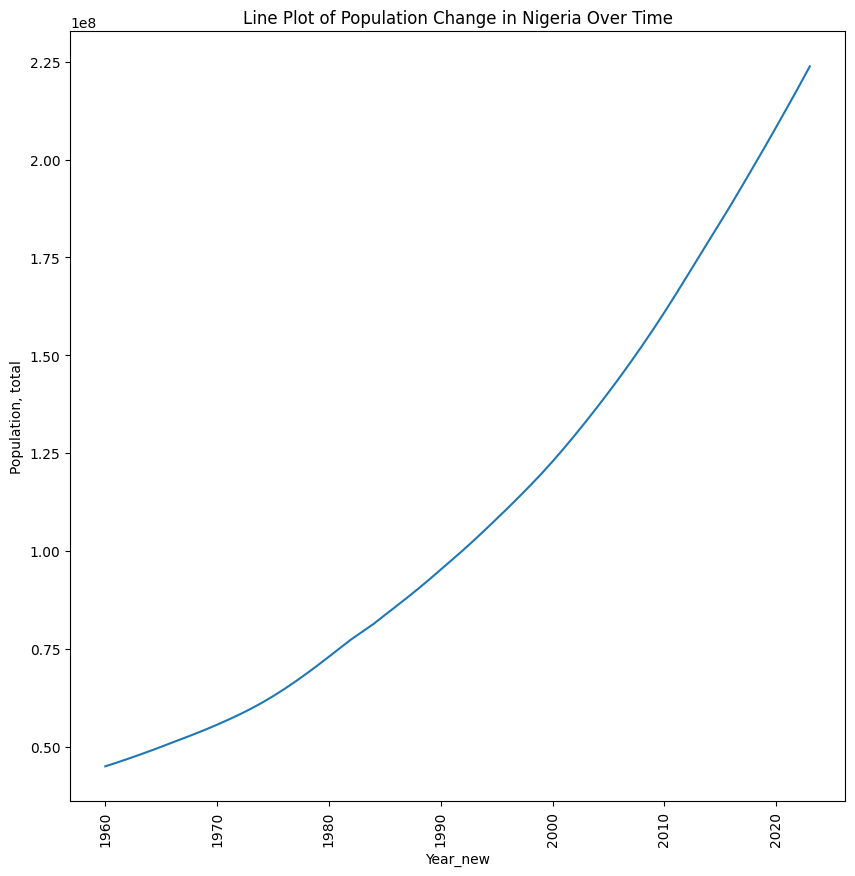

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Year_new',
             y='Population, total',
             data=ngn_na_10_or_less)
plt.xlabel="Year"
plt.xticks(rotation=90)
plt.title('Line Plot of Population Change in Nigeria Over Time')

Unsurprisingly, the population of Nigeria has been on an upward trajectory since 1960

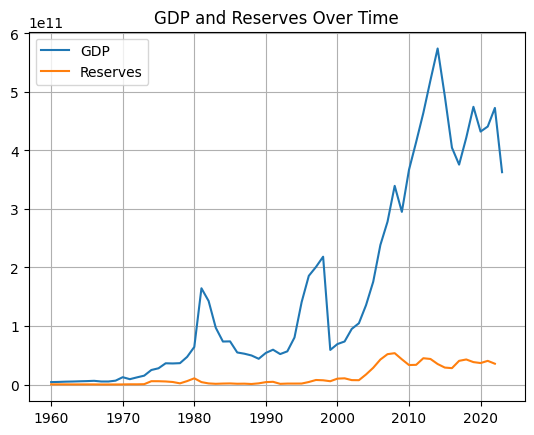

In [ ]:
plt.plot(ngn_new['Year_new'], ngn_na_10_or_less['GDP (current US$)'], label='GDP')
plt.plot(ngn_new['Year_new'], ngn_na_10_or_less['Total reserves (includes gold, current US$)'], label='Reserves')

plt.title('GDP and Reserves Over Time')
plt.legend()
plt.grid(True)

plt.show()

I expected reserves to grow relatively with GDP but surprised it did not

####3. I want to compare merchandise imports with merchandise exports but not for all the data on record, only for the last 5 years

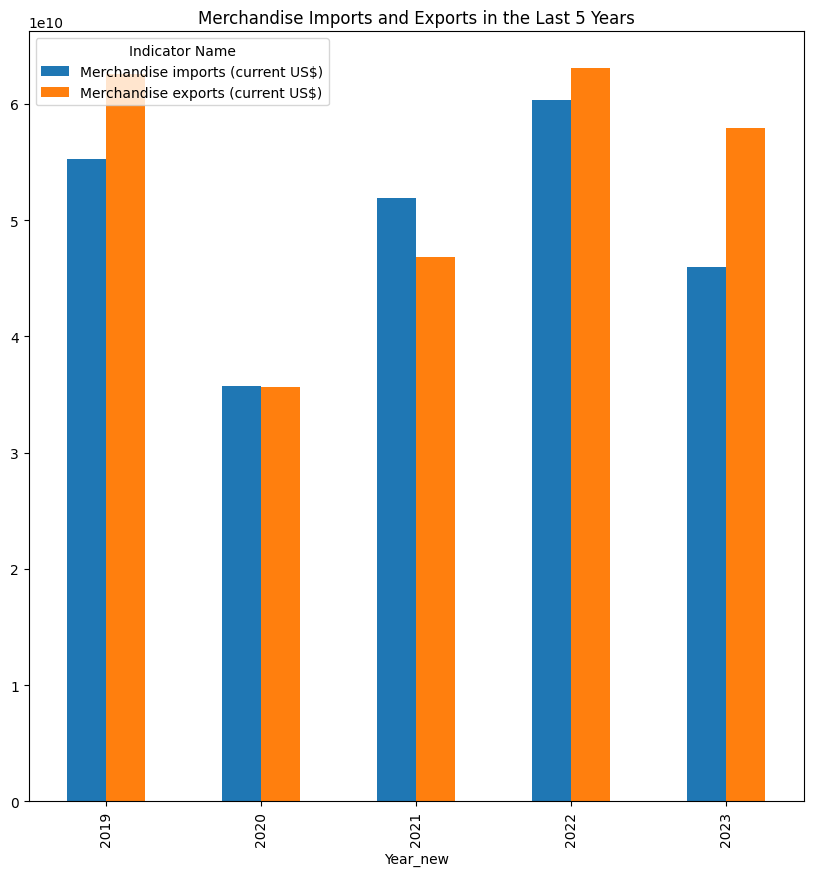

In [ ]:
#3. I want to compare merchandise imports with merchandise exports
compare_merchandise = ngn_na_10_or_less[['Year_new', 'Merchandise imports (current US$)', 'Merchandise exports (current US$)']]

#create a bar plot of the last 5 years
compare_merchandise.tail(5).plot(x='Year_new', kind='bar', figsize=(10,10))
plt.title('Merchandise Imports and Exports in the Last 5 Years')
plt.show()

It is interesting to see that generally, Nigeria exports more than she imports. I've always had the assumption that it was the opposite.

2020 had the lowest totals for both imports and exports, perhaps due to lockdowns implemented during the COVID pandemic which caused a drop in oil prices which is Nigeria's largest export

In [ ]:
#avg exports minus imports
total_exports_minus_imports = ngn_na_10_or_less['Merchandise exports (current US$)'].sum() - ngn_na_10_or_less['Merchandise imports (current US$)'].sum()
print(f'The difference between the total merchandise imports and exports is: ${round(total_exports_minus_imports)}')

The difference between the total merchandise imports and exports is: $596147000000


Further exploring the data, we see that overitme, Nigeria has in total since 1960 exported more than she has imported

####4. What is the median amount Nigeria has had in reserve for the past 10 years

In [ ]:
past_10_years = ngn_na_10_or_less[(ngn_na_10_or_less['Year_new'] >=2013) & (ngn_na_10_or_less['Year_new'] <= 2023)]
median_reserve_in_past_10_years = round(past_10_years['Total reserves (includes gold, current US$)'].median())
print(f'The median amount of reserve in Nigeria for the past 10 years is: ${median_reserve_in_past_10_years}')

The median amount of reserve in Nigeria for the past 10 years is: $37532728148


####5. What is the average GDP per capita

In [ ]:
avg_gdp = round(ngn_na_10_or_less['GDP per capita (current US$)'].mean())
print(f'The average GDP per capita of Nigeria since 1960 till 2023 is: ${avg_gdp}')

The average GDP per capita of Nigeria since 1960 till 2023 is: $1106


Nigeria's average GDP per capita is not very high comapred to other developed countries with the highest from 2023 being [Luxemburg](https://www.investopedia.com/terms/p/per-capita-gdp.asp#toc-how-is-gdp-per-capita-calculated:~:text=7-,Countries%20with%20the%20Highest%20GDP%20Per%20Capita,-These%20are%20the) with a GDP per capita of $131,380

### Outliers



####6. From exploring the data using .describe(), I noticed that 'Foreign direct investment, net inflows(% of GDP)' could contain *outliers*. Now I want to investigate that.

I will do this by first creating a box plot to visualise the data.

Then I will calculate the quartiles and then view the outliers

<Figure size 1000x1000 with 0 Axes>

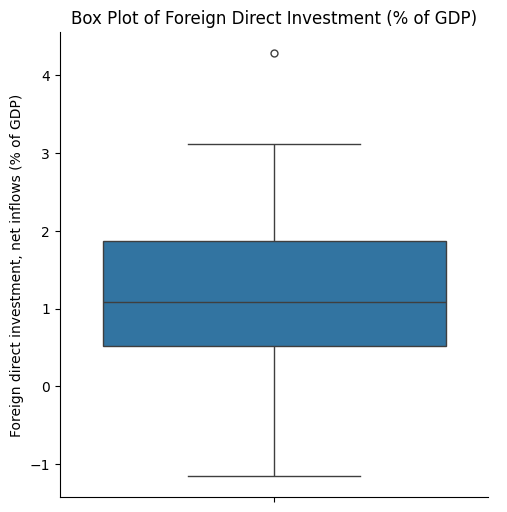

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(y='Foreign direct investment, net inflows (% of GDP)',
            data=ngn_na_10_or_less,
            kind='box')
plt.title('Box Plot of Foreign Direct Investment (% of GDP)')

plt.show()

This boxplot shows that there is a high outliers but no low outliers. So I'll calculate the high outliers using the quartile ranges

In [ ]:
q1_fi = ngn_na_10_or_less['Foreign direct investment, net inflows (% of GDP)'].quantile(0.25)
q3_fi = ngn_na_10_or_less['Foreign direct investment, net inflows (% of GDP)'].quantile(0.75)
iqr_fi = q3_fi - q1_fi
high_outliers = ngn_na_10_or_less[ngn_na_10_or_less['Foreign direct investment, net inflows (% of GDP)'] > q3_fi + 1.5 * iqr_fi]
high_outliers[['Year', 'Foreign direct investment, net inflows (% of GDP)']].head()

Indicator Name,Year,"Foreign direct investment, net inflows (% of GDP)"
29,1989,4.282088


From this, we can see that there is one outlier from 1989. Unsure why that would be the case but something to potentially explore further

####7. We can explore explore outliers in all the columns of interest

First building boxplots for all of them
* Net migration
* Inflation, consumer prices (annual %)

* GDP per capita (current US$)

* GDP (current US$)

* Merchandise imports (current US$)

* Merchandise exports (current US$)

* Total reserves (includes gold, current US$)
* Foreign direct investment, net inflows (% of GDP)
* Life expectancy at birth, total (years)



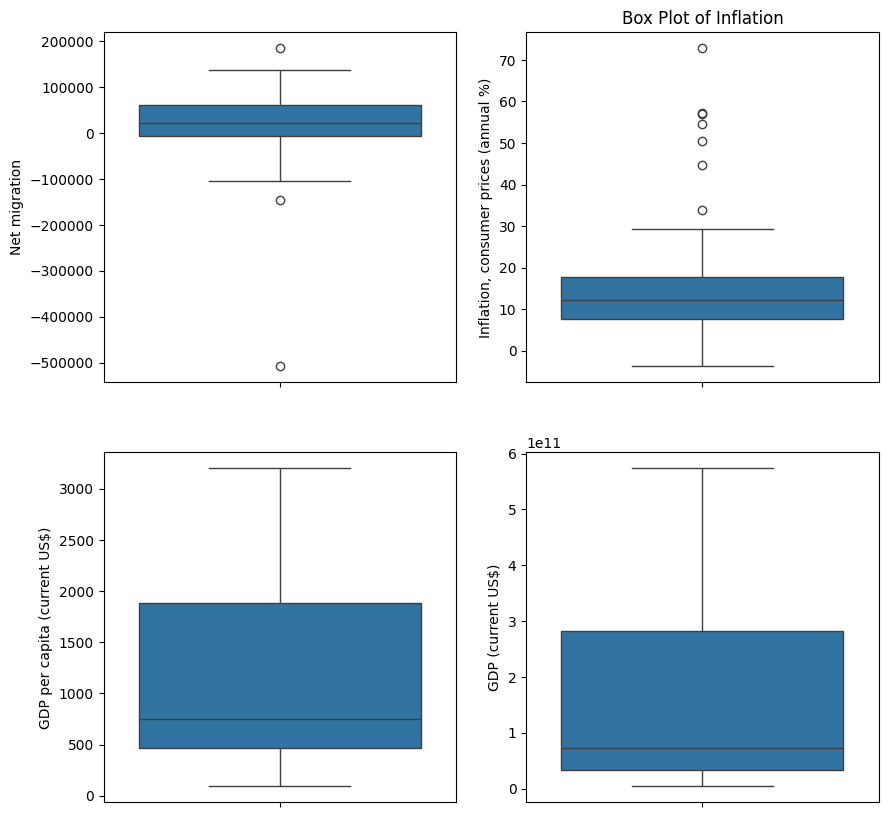

In [ ]:
plt.figure(figsize=(10,10))

#boxplot for net migration
plt.subplot(2,2,1)
sns.boxplot(y='Net migration', data=ngn_na_10_or_less)

#boxplot for inflation
plt.subplot(2,2,2)
sns.boxplot(y='Inflation, consumer prices (annual %)', data=ngn_na_10_or_less)
plt.title('Box Plot of Inflation')

#boxplot for gdp per capita
plt.subplot(2,2,3)
sns.boxplot(y='GDP per capita (current US$)', data=ngn_na_10_or_less)

#boxplot for gdp
plt.subplot(2,2,4)
sns.boxplot(y='GDP (current US$)', data=ngn_na_10_or_less)

plt.show()

From the data, we can see that there are no outliers for *GDP per capita* and *GDP* but there are for *Net migration* and *Inflation*

These will be further explored

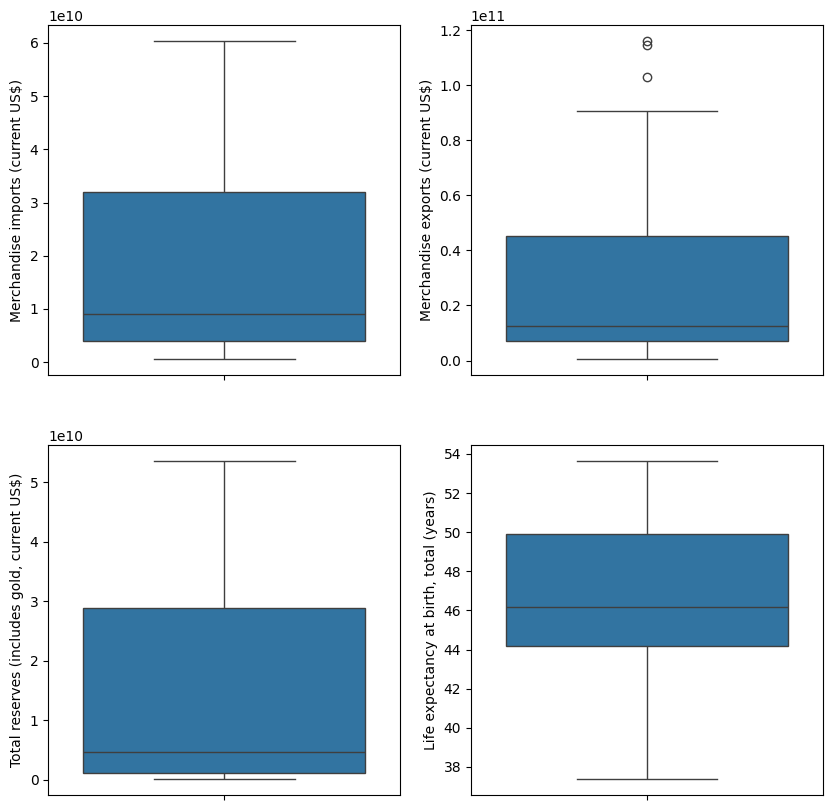

In [ ]:
plt.figure(figsize=(10,10))

#boxplot for merchandise imports
plt.subplot(2,2,1)
sns.boxplot(y='Merchandise imports (current US$)', data=ngn_na_10_or_less)

#boxplot for merchandise exports
plt.subplot(2,2,2)
sns.boxplot(y='Merchandise exports (current US$)', data=ngn_na_10_or_less)

#boxplot for total reserves
plt.subplot(2,2,3)
sns.boxplot(y='Total reserves (includes gold, current US$)', data=ngn_na_10_or_less)

#boxplot for life expectancy
plt.subplot(2,2,4)
sns.boxplot(y='Life expectancy at birth, total (years)', data=ngn_na_10_or_less)

plt.show()

From the data, we see that only *Merchandise exports* has outliers

Now we can calculate the outliers for these columns with outliers

In [ ]:
columns_with_outliers = ngn_na_10_or_less[['Net migration', 'Inflation, consumer prices (annual %)', 'Merchandise exports (current US$)']]

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


#detect outliers in Net migration
outliers_net_migration = detect_outliers(ngn_na_10_or_less, 'Net migration')
outliers_net_migration[['Year', 'Net migration']]



Indicator Name,Year,Net migration
20,1980,184467.0
23,1983,-507539.0
55,2015,-145917.0


In [ ]:
#outliers in inflation
outliers_inflation = detect_outliers(ngn_na_10_or_less, 'Inflation, consumer prices (annual %)')
outliers_inflation[['Year', 'Inflation, consumer prices (annual %)']]

Indicator Name,Year,"Inflation, consumer prices (annual %)"
15,1975,33.964188
28,1988,54.511225
29,1989,50.466688
32,1992,44.588843
33,1993,57.165253
34,1994,57.031709
35,1995,72.835502


In [ ]:
#outliers in merchandise exports
outliers_merchandise_exports = detect_outliers(ngn_na_10_or_less, 'Merchandise exports (current US$)')
outliers_merchandise_exports[['Year', 'Merchandise exports (current US$)']]

Indicator Name,Year,Merchandise exports (current US$)
51,2011,1.160000e+11
52,2012,1.147000e+11
54,2014,1.031000e+11


### Correlations



####8. I wanted to see what data points are correlated, so from the dataFrame of columns with less than 10 missing values, I selected the columns with data that I found interesting
- 'Net migration'
- 'Inflation, consumer prices (annual %)'
- 'GDP per capita (current US$)'

- 'GDP (current US$)'

- 'Population in largest city'
- 'Population, total'
- 'Merchandise imports (current US$)',

- 'Merchandise exports (current US$)'

- 'Urban population (% of total population)'
- 'Rural population (% of total population)'


- 'Population ages 15-64, total'
- 'Age dependency ratio, old (% of working-age population)'

- 'Total reserves (includes gold, current US$)'

- 'Foreign direct investment, net inflows (% of GDP)'
- 'Life expectancy at birth, total (years)'

Initially, I tried to do a correlation matrix with all the columns but it was too much and barely visible, so I selected the above columns because I expect that they might reveal interesting insights


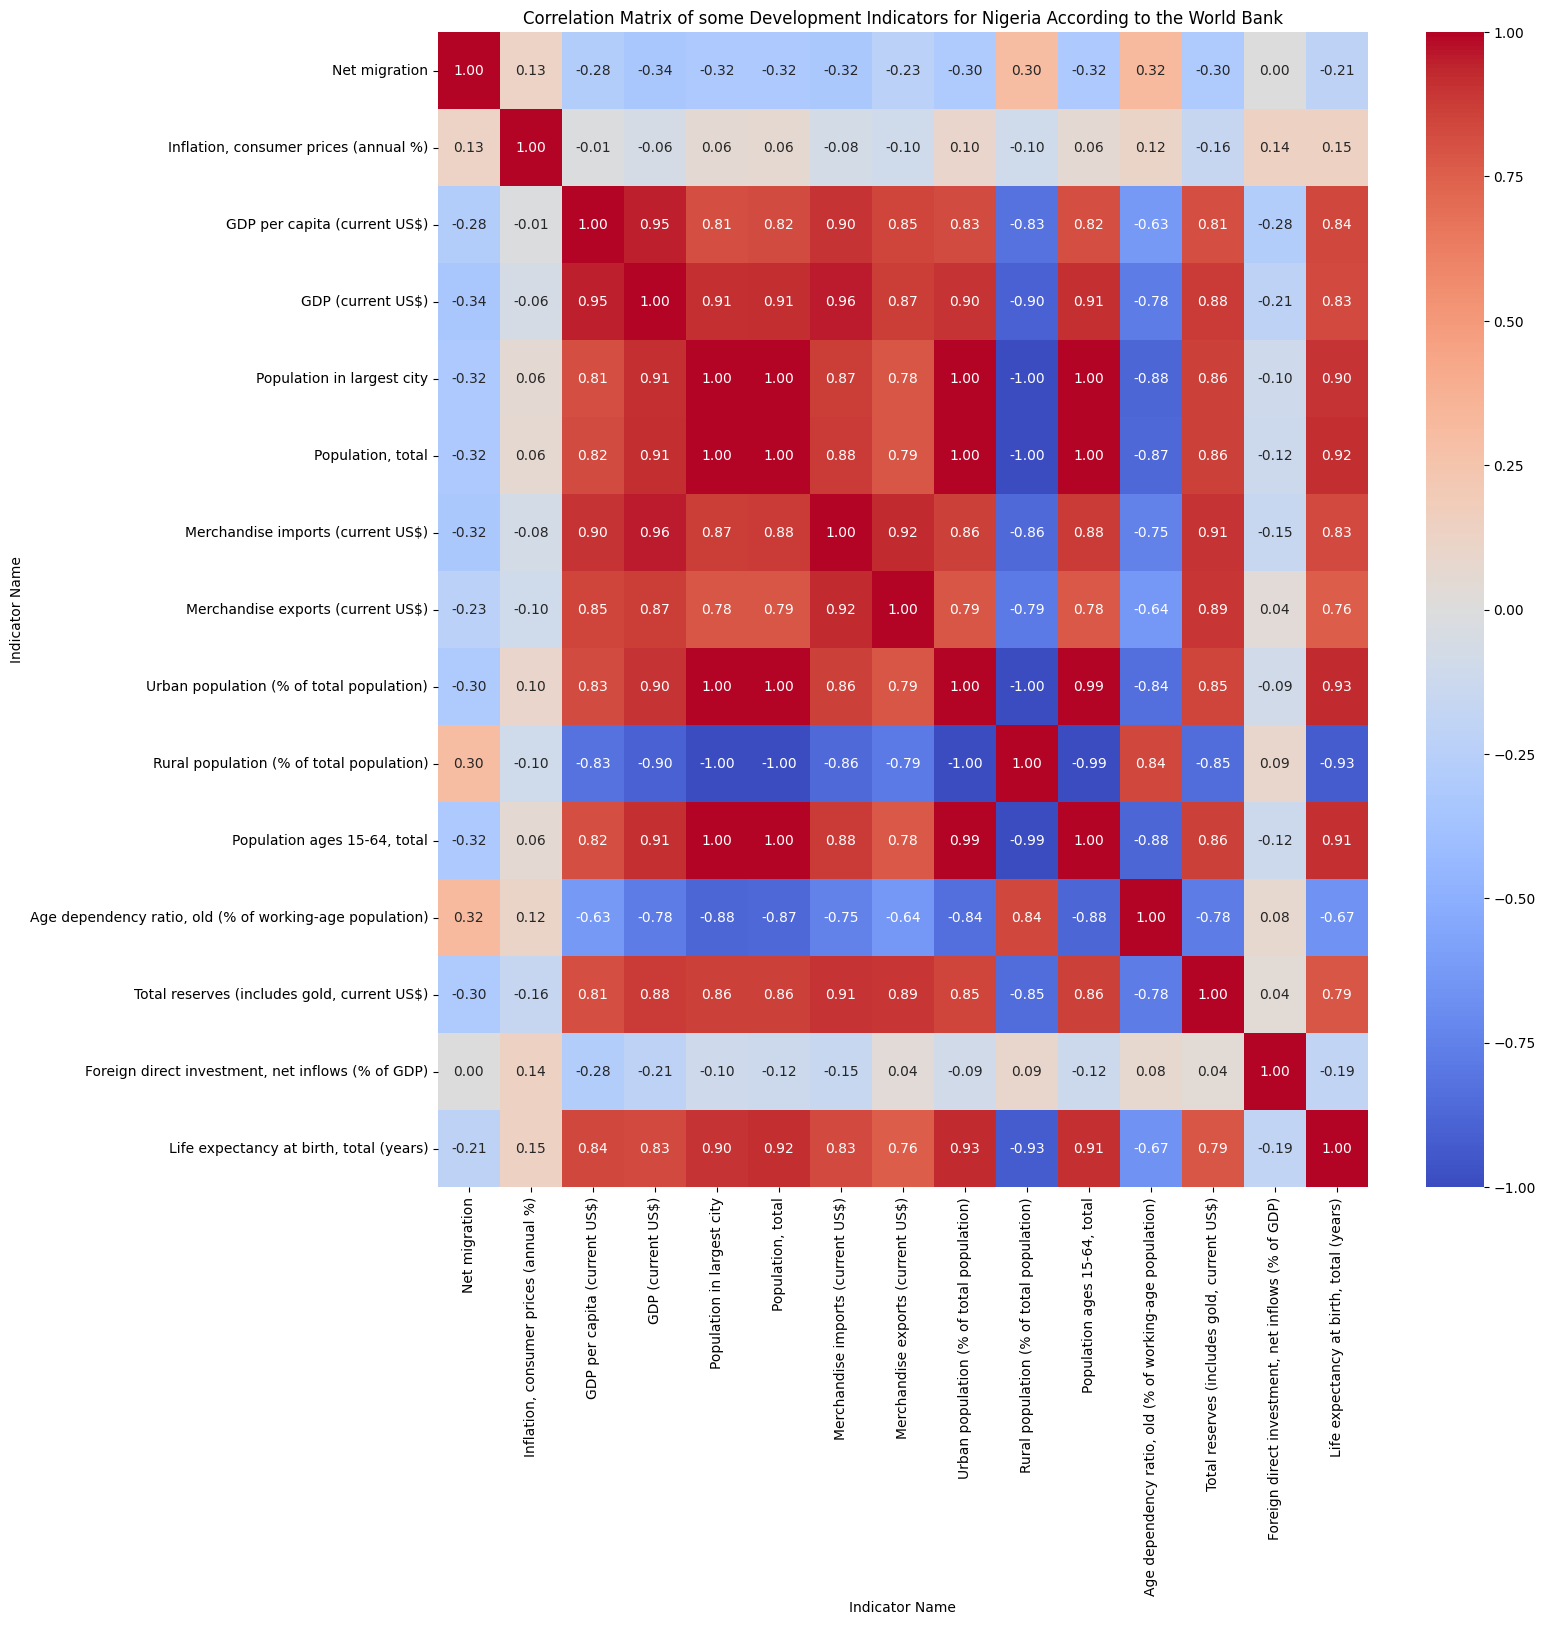

In [ ]:
columns_of_interest = ngn_na_10_or_less[['Net migration', 'Inflation, consumer prices (annual %)', 'GDP per capita (current US$)', 'GDP (current US$)', 'Population in largest city', 'Population, total', 'Merchandise imports (current US$)', 'Merchandise exports (current US$)', 'Urban population (% of total population)', 'Rural population (% of total population)', 'Population ages 15-64, total', 'Age dependency ratio, old (% of working-age population)', 'Total reserves (includes gold, current US$)', 'Foreign direct investment, net inflows (% of GDP)', 'Life expectancy at birth, total (years)']]
correlation_matrix = columns_of_interest.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of some Development Indicators for Nigeria According to the World Bank')
plt.show()

From the correlation matrix, it is interesting to note that *Net migration* and *Inflation, consumer prices (annual %)* do not correlate with any other indicator. I had expected Inflation to correlate with GDP. And *Inflation* with *Net migration*

I am also surprised that *Foreign direct investment, net inflows (% of GDP)* does not correlate with *Merchandise exports* or *Total reserves (includes gold, current US$)*

On the other hand, it is not surprising that the *GDP (current US$)* correlates with the working population *(Population ages 15-64, total)*.

But I am surprised that although there is a negative correlation between GDP and *Age dependency ratio, old (% of working-age population)*, it is not very high

####9. I want to see the relationship between 'Net migration' and 'Inflation, consumer prices (annual %)'

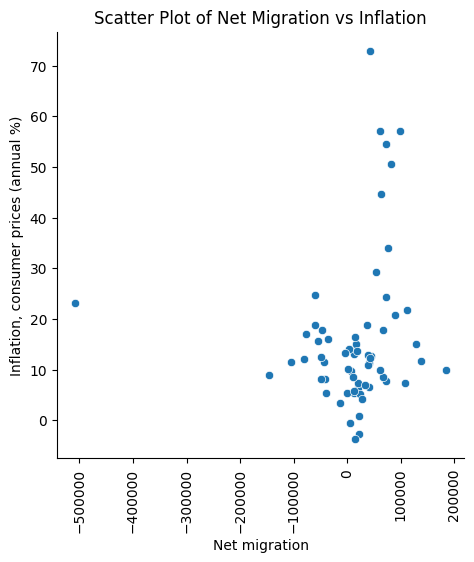

In [ ]:
sns.relplot(x='Net migration',
            y='Inflation, consumer prices (annual %)',
            data=ngn_na_10_or_less,
            kind='scatter')
plt.title('Scatter Plot of Net Migration vs Inflation')
plt.xticks(rotation=90)
plt.show()

There does not seem to be much of a relationship between the two. It also appears that there might be some outliers, which have been explored above.

I also expected *Net Migration* to correlate with *Inflation* with the expectation that the more expensive things got the more people would want to leave to places with better cost of living for example

We can visualise the precise correlation further First by viewing the distribution of the data using a histogram

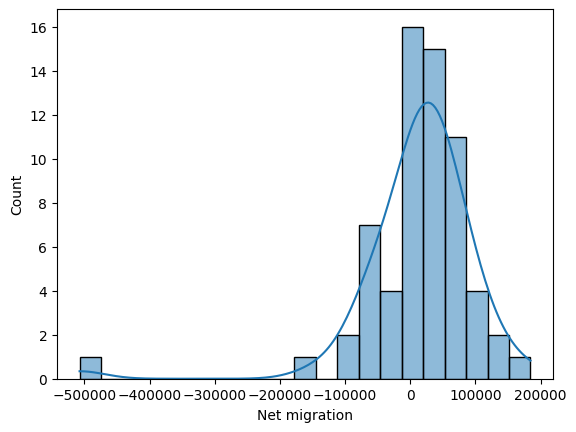

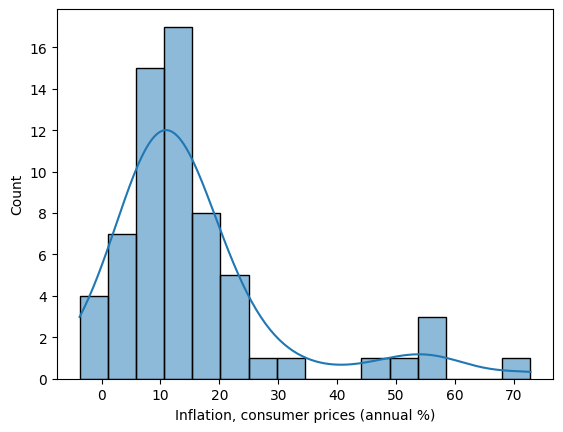

In [ ]:
sns.histplot(ngn_na_10_or_less['Net migration'], kde=True)
plt.show()
sns.histplot(ngn_na_10_or_less['Inflation, consumer prices (annual %)'], kde=True)
plt.show()

Net migration is left skewed and inflation is right skewed.

So we can normalise them by calculating log values

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


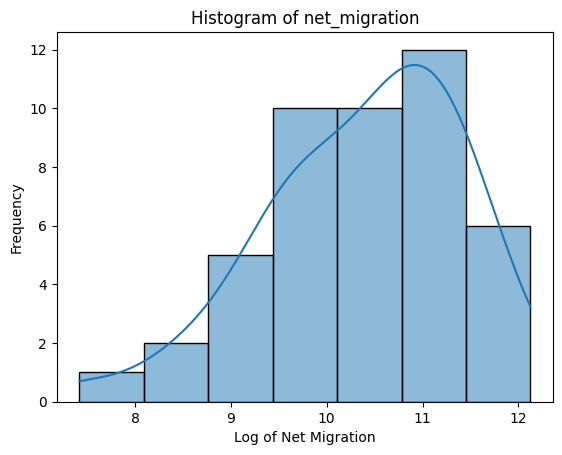

In [ ]:
ngn_na_10_or_less['log_net_migration'] = np.log(ngn_na_10_or_less['Net migration'])
sns.histplot(ngn_na_10_or_less['log_net_migration'], kde=True)
plt.xlabel('Log of Net Migration')
plt.ylabel('Frequency')
plt.title('Histogram of net_migration')
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


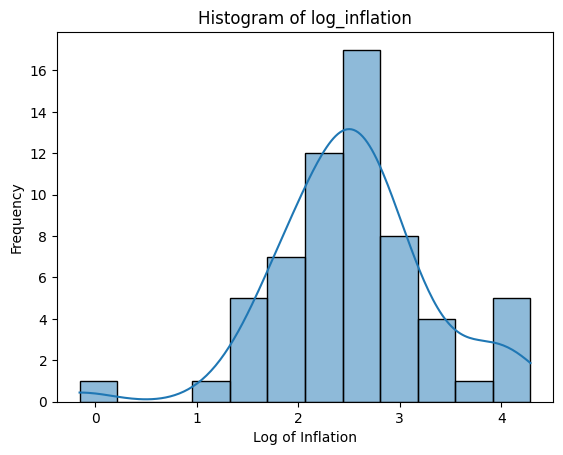

In [ ]:
ngn_na_10_or_less['log_inflation'] = np.log(ngn_na_10_or_less['Inflation, consumer prices (annual %)'])
sns.histplot(ngn_na_10_or_less['log_inflation'], kde=True)
plt.xlabel('Log of Inflation')
plt.ylabel('Frequency')
plt.title('Histogram of log_inflation')
plt.show()

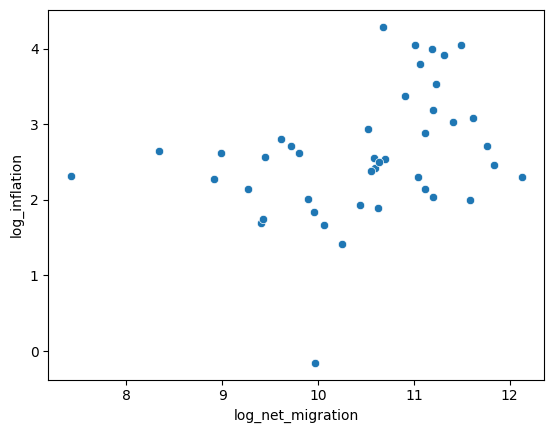

The correlation between log_net_migration and log_inflation is: 0.34155091902392476


In [ ]:
sns.scatterplot(data=ngn_na_10_or_less, x='log_net_migration', y='log_inflation')
plt.show()

cor = ngn_na_10_or_less['log_net_migration'].corr(ngn_na_10_or_less['log_inflation'])
print(f'The correlation between log_net_migration and log_inflation is: {cor}')

### Conclusions and reflections

One of the more challenging parts of this project was finding a dataset. As I mentioned above, it was challenging to find a dataset close enough to what would be required for the client project as it relates to customer information and we had not yet received anything that could give us insight into the data structure, if not the actual data itself.

After choosing a dataset, cleaning the data was a bit challenging. Especially working with such a large dataset with so many variables (Indicators).

First figuring out how to swap the indicator name column with the year headers was a big challenge. I knew I had to drop the first 2 columns but I wasn't sure how to. I initially tried creating a new variable and assigning it the column names then assigning that to make new columns in the dataframe and then deleting the old column names but it didn't work. I eventually googled and discovered a simple function `.T` that solved that problem.

It was also a bit of challenge to determine what to do with missing values but I have already outlined my decision making process above.

Also after transposing the header row and first column, `.info()` was not showing a list of columns and their non null values and data type as I expected, presumably because there were almost 1500 columns. It took me a while to figure out what the output meant because I was used to the other more detailed output.

I also struggled with the code for dropping the columns with more than 10 missing values which I also explained above

### Conclusions about the data
It is not surprising that there was a lot of missing data. Nigeria is not very well known for the availability of data.

However, from the explorations, there were a few surprising things. For example, Nigeria exports more in $ terms than she imports, GDP and Total Reserves did not grow at the same pace, and there was no correlation between certain indicators that I expected, as described above.